# Basic Setup and Installations

In [1]:
# use pytorch to build a convolutional neural network
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch import optim
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchmetrics import Accuracy, Precision, F1Score

import itertools
# from pyimagesearch import config
from imutils import paths
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt

In [2]:
# use GPUs if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# specify path to the flowers and mnist dataset
CURRENT_DATASET_PATH = "dataset-for-classification"
# FINAL_DATASET_PATH = "dataset-final"
# # specify the paths to our training and validation set 
# TRAIN = "train"
# VAL = "val"
# # set the input height and width
# INPUT_HEIGHT = 128
# INPUT_WIDTH = 128
# # set the batch size and validation data split
# BATCH_SIZE = 8
# VAL_SPLIT = 0.1

In [4]:
# build the dataset
df = pd.read_csv('training_set.csv', index_col=0)
df

,nose_scaled_x,nose_scaled_y,nose_score,left_eye_scaled_x,left_eye_scaled_y,left_eye_score,right_eye_scaled_x,right_eye_scaled_y,right_eye_score,left_ear_scaled_x,...,right_knee_scaled_x,right_knee_scaled_y,right_knee_score,left_ankle_scaled_x,left_ankle_scaled_y,left_ankle_score,right_ankle_scaled_x,right_ankle_scaled_y,right_ankle_score,pose
./dataset-for-classification/paripurna-navasana/7ef89ad4433e9e5af2218d2c870845a44f994b18a123852e79c585f77bdc1488.png,0.558346,0.041068,1.949889,0.540620,0.001027,1.943505,0.512555,0.000000,2.750488,0.304284,...,0.985229,0.465092,0.057829,0.995569,0.407598,0.091656,1.000000,0.407598,0.083489,38
./dataset-for-classification/padmasana/2ba9fd144da5dee7636bac100b1961875f69e66e0e4007ceba31ea32d40ff0b5.jpeg,0.491987,0.032258,1.857787,0.540064,0.001536,1.265977,0.448718,0.000000,1.498770,0.599359,...,0.067308,0.983103,0.143049,0.474359,0.955453,0.138958,0.330128,0.826421,0.221899,37
./dataset-for-classification/upavistha-konasana/105c894c324470bffd7517867d5ac97db8dd8765bd787b0c4b36f1aadf069c1e.png,0.596422,0.031532,0.972064,0.638171,0.000000,1.963699,0.554672,0.000000,4.430774,0.681909,...,0.053678,1.000000,0.042947,0.675944,1.000000,0.078737,0.000000,0.898649,0.047240,60
./dataset-for-classification/marjaryasana/8dc6474628fdf057f89bc360f1275070ae7bf5b4b17433c50543e663ee26680a.png,0.972571,0.205837,0.270333,0.989714,0.168971,0.216276,0.965714,0.168971,0.173521,0.942857,...,0.366857,0.304147,0.328321,0.413714,0.960061,0.116407,0.000000,0.906298,0.208869,33
./dataset-for-classification/urdhva-prasarita-eka-padasana/157976074d7a676da7623d971725c399ec46656350936d278bf46eb09a775475.png,0.568889,0.785776,0.601770,0.724444,0.822203,0.106847,0.760000,0.821336,0.153943,0.826667,...,0.000000,0.202082,0.167313,0.053333,0.884649,0.429937,0.035556,0.000000,0.297149,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./dataset-for-classification/adho-mukha-vrksasana/e160e25b7e8bea91a6f1d5cf4914a667a5f9b03bc12bbe791fe3ab7d569cfe14.png,1.000000,0.787596,0.249642,0.723926,0.751062,0.069631,0.797546,0.751912,0.249675,0.116564,...,0.564417,0.225149,0.167277,0.570552,1.000000,0.087273,0.404908,0.000000,0.144229,2
./dataset-for-classification/chaturanga-dandasana/ced03afa1c06fb3cd419e700dbe7357c83ca0b9d28785d240ab5a0e4024633df.png,0.535976,0.797297,0.193930,0.007342,0.483108,0.220233,0.000000,0.479730,0.024991,0.024963,...,1.000000,0.290541,0.029234,0.493392,0.956081,0.162056,0.490455,0.969595,0.166776,19
./dataset-for-classification/utthita-parsvakonasana/194d700849c2954d3fa3135214fb5fc5c843836cdeba24a804f880ec477746da.png,0.142606,0.252717,0.332290,0.147887,0.240489,0.207598,0.077465,0.240489,0.511607,0.061620,...,0.105634,0.650815,0.174187,0.063380,0.998641,0.279461,0.058099,1.000000,0.481291,70
./dataset-for-classification/supta-baddha-konasana/e06ef7b69d0c200b15de610cec58147925918eca05ba9c65966901aadcbccef8.png,0.046092,0.067285,0.932778,0.025050,0.060325,0.471865,0.011022,0.125290,0.693817,0.000000,...,0.986974,0.000000,0.242699,1.000000,0.656613,0.180462,0.995992,0.631090,0.305968,53


In [5]:
classes = df['pose'].unique()
len(classes)

82

# Building a Custom Dataset

In [70]:
# df.to_csv('dataset-annotations.csv', header=False)
# df.sample(5).to_csv('dataset-annotations-head.csv', header=False)

In [12]:
classes = [
    'adho-mukha-svanasana',
    'adho-mukha-vriksasana',
    'adho-mukha-vrksasana',
    'ananda-balasana',
    'anjaneyasana',
    'ardha-chandrasana',
    'ardha-matsyendrasana',
    'ardha-pincha-mayurasana',
    'ardha-uttanasana',
    'astavakrasana',
    'baddha-konasana',
    'bakasana',
    'balasana',
    'bharadvajasana-i',
    'bhujangasana',
    'bhujapidasana',
    'bitilasana',
    'camatkarasana',
    'chakravakasana',
    'chaturanga-dandasana',
    'dandasana',
    'dhanurasana',
    'dwi-pada-viparita-dandasana',
    'eka-pada-koundinyanasana-i',
    'eka-pada-koundinyanasana-ii',
    'eka-pada-rajakapotasana',
    'eka-pada-rajakapotasana-ii',
    'garudasana',
    'gomukhasana',
    'halasana',
    'kapotasana',
    'makarasana',
    'malasana',
    'marjaryasana',
    'matsyasana',
    'mayurasana',
    'natarajasana',
    'padmasana',
    'paripurna-navasana',
    'parivrtta-trikonasana',
    'parsva-bakasana',
    'pasasana',
    'paschimottanasana',
    'phalakasana',
    'prasarita-padottanasana',
    'purvottanasana',
    'salabhasana',
    'salamba-bhujangasana',
    'salamba-sarvangasana',
    'salamba-sirsasana',
    'savasana',
    'setu-bandha-sarvangasana',
    'sukhasana',
    'supta-baddha-konasana',
    'supta-matsyendrasana',
    'supta-padangusthasana',
    'supta-virasana',
    'tadasana',
    'tittibhasana',
    'tolasana',
    'upavistha-konasana',
    'urdhva-dhanurasana',
    'urdhva-mukha-svanasana',
    'urdhva-prasarita-eka-padasana',
    'ustrasana',
    'utkatasana',
    'uttana-shishosana',
    'uttanasana',
    'utthita-hasta-padangustasana',
    'utthita-hasta-padangusthasana',
    'utthita-parsvakonasana',
    'utthita-trikonasana',
    'vajrasana',
    'vasisthasana',
    'viparita-karani',
    'virabhadrasana-i',
    'virabhadrasana-ii',
    'virabhadrasana-iii',
    'virasana',
    'vriksasana',
    'vrischikasana',
    'vrksasana'
]

In [6]:
from PIL import Image
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor, Lambda

class CollectionsDataset(Dataset):
    def __init__(self, csv_file, root_dir, num_classes, transform=None, target_transform=None):
        self.data = pd.read_csv(csv_file, index_col=0, header=None)
        self.root_dir = root_dir
        self.transform = transform
        self.num_classes = num_classes

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data.index[idx])
        # img_name = os.path.join(self.root_dir, self.data.index[idx])
        image = Image.open(img_name).convert('RGB')
        # TODO: resizing and whatnot?
        pose = self.data.iloc[idx, -1]
        # labels = labels.split()

        pose_tensor = torch.zeros(self.num_classes)
        pose_tensor[int(pose)] = 1
        # pose_tensor = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
        dataframe = self.data.iloc[idx, :-1]

        if self.transform:
            image = self.transform(image)

        return image, pose_tensor
            # {
            # 'image': image,
            # 'pose': pose_tensor,
            # 'keypoints': dataframe
            # }
    

transformer = torchvision.transforms.Compose([
    # transforms.ToPILImage(),
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor(),
    # transforms.PILToTensor()
])
target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))

# create the dataset
dataset = CollectionsDataset(csv_file='training_set.csv', root_dir=CURRENT_DATASET_PATH, num_classes=len(classes), transform=transformer)
# dataset = CollectionsDataset(csv_file='dataset-annotations-head.csv', root_dir=CURRENT_DATASET_PATH, num_classes=len(classes), transform=transforms.ToTensor())

In [7]:
len(dataset)

3314

In [8]:
train_dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [9]:
train_dataloader

In [10]:
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64, 82])


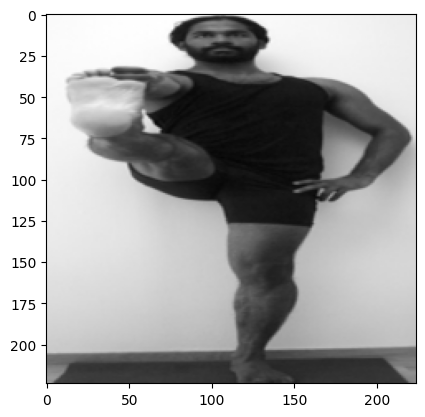

Label: utthita-hasta-padangusthasana


In [13]:
img = train_features[0]
label = train_labels[0]
plt.imshow(img.permute(1, 2, 0))

label = torch.argmax(label)
plt.show()
print(f"Label: {classes[label]}")

In [183]:
# taken from here - https://www.kaggle.com/code/elinteerie/yoga-posture-acc-93-f1score-92-8
# import torch.utils.data as data

# # Random split
# train_set_size = int(len(datafolder) * 0.8)
# valid_set_size = len(datafolder) - train_set_size
# train_set, valid_set = data.random_split(datafolder, [train_set_size, valid_set_size])

In [14]:
import torchvision
from torchvision import models
import torchvision.models.efficientnet as e
import torchvision.models.resnet as r

In [18]:
WEIGHTS = r.resnet50(pretrained=True)
WEIGHTS2 = e.efficientnet_b0(pretrained=True)

/Users/dubplate/.pyenv/versions/3.8.0/envs/capstone/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/dubplate/.pyenv/versions/3.8.0/envs/capstone/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/dubplate/.pyenv/versions/3.8.0/envs/capstone/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weig

In [29]:
class YogaNet(nn.Module):
    def __init__(self, base_model, additional_dims, num_classes=82):
        super().__init__()
        self.base_model = base_model

        for p in self.base_model.parameters():
            p.requires_grad = False

        # self.kpts = nn.Sequential(
        #     nn.Linear(additional_dims, additional_dims*4),
        #     nn.ReLU(),
        #     nn.Dropout(0.5),
        #     nn.Linear(additional_dims*4, additional_dims*2),
        #     nn.ReLU(),
        #     nn.Dropout(0.5),
        #     nn.Linear(additional_dims*2, additional_dims)
        # )

        # self.base_model.fc = nn.Linear(2048 + additional_dims, num_classes)
        self.base_model.fc = nn.Linear(2048, num_classes)
        
    def forward(self, x):
        # x = F.relu(self.base_model(x))
        # x = F.relu(self.fc2(x))
        # output = self.fc3(x)

        output = F.relu(self.base_model(x))


        if self.training is not True:
            output = self.softmax_layer(x)

        return output
    

In [30]:
model = YogaNet(WEIGHTS, additional_dims=0)

In [31]:
model.state_dict

<bound method Module.state_dict of YogaNet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      

In [32]:
# WEIGHTS.fc = nn.Sequential(
#     nn.Linear(2048, 128),
#     nn.ReLU(inplace=True),
#     nn.Linear(128, len(classes))
# ).to(device)

In [33]:
# from torch.utils.data import DataLoader
# BATCH_SIZE = 32
# train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)
# test_loader = DataLoader(dataset=valid_set, batch_size=BATCH_SIZE)

In [34]:
loss_fn = nn.CrossEntropyLoss().to(device)
# change WEIGHTS to model
optimizer = optim.Adam(model.parameters(), lr= 0.01)
accuracy_fn = Accuracy(task='multiclass', num_classes=len(classes)).to(device)
f1 = F1Score(task='multiclass', num_classes=len(classes)).to(device)

In [37]:
EPOCHS = 10

train_losses, train_acc = 0, 0

for epoch in range(EPOCHS):
  for batch, (X, y)in enumerate(train_dataloader):
    X = X.to(device)
    y = y.to(device)
    # should change WEIGHTS to model
    model.train()

    # should change model to model
    y_pred = model(X)
    print(y_pred.shape)
    print(y.shape)
    print('-----------')
    print(y_pred)
    print(y)
    loss = loss_fn(y_pred, y)
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)
    train_losses += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if batch % 100 == 0:
      print(f'{train_losses} | {train_acc}')

  train_losses /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  print(f' Train Loss: {train_losses:.4f} | Train Acc: {train_acc:.3f}')

torch.Size([64, 82])
torch.Size([64, 82])
-----------
tensor([[0.3446, 0.2977, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0323, 0.1436, 0.2204,  ..., 0.0000, 0.0000, 0.0000],
        [0.3520, 0.3468, 0.0672,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.3997, 0.3800, 0.1048,  ..., 0.0000, 0.0000, 0.0048],
        [0.3549, 0.0000, 0.1718,  ..., 0.0659, 0.0000, 0.0000],
        [0.3306, 0.3409, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


ValueError: Either `preds` and `target` both should have the (same) shape (N, ...), or `target` should be (N, ...) and `preds` should be (N, C, ...).

----
----
----

In [96]:
        # row = self.df.iloc[idx]
        # X = torch.tensor(row.drop(['pose']).values, dtype=torch.float)
        # y = torch.tensor(row['pose'], dtype=torch.long)
        # return X, y

In [122]:
transformers = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    # convert PIL to image
    transforms.ToPILImage(),
])
data = YogaDataset('dataset-annotations.csv', CURRENT_DATASET_PATH, transform=transformers)

In [123]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(data, batch_size=64, shuffle=True)

In [124]:
transforms.functional.get_image_num_channels(data[1][0])

# transforms.functional.get_image_num_channels(data[1][0])

/Users/dubplate/.pyenv/versions/3.11-dev/envs/bs-env/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [118]:
transforms.functional.get_image_num_channels(data[0][0])

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [119]:
data[0]

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [120]:
train_dataloader

In [121]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(train_labels)
# print(f"Labels batch shape: {train_labels.size()}")
# img = train_features[0].squeeze()
# label = train_labels[0]
# plt.imshow(img, cmap="gray")
# plt.show()
# print(f"Label: {label}")


TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [ ]:
def copy_images(imagePaths, folder):
    # check if the destination folder exists and if not create it
    if not os.path.exists(folder):
        os.makedirs(folder)
    # loop over the image paths
    for path in imagePaths:
        # grab image name and its label from the path and create
        # a placeholder corresponding to the separate label folder
        imageName = path.split(os.path.sep)[-1]
        label = path.split(os.path.sep)[-2]
        labelFolder = os.path.join(folder, label)
        # check to see if the label folder exists and if not create it
        if not os.path.exists(labelFolder):
          os.makedirs(labelFolder)
        # construct the destination image path and copy the current
        # image to it
        destination = os.path.join(labelFolder, imageName)
        shutil.copy(path, destination)



print("[INFO] loading image paths...")
imagePaths = list(paths.list_images(config.FLOWERS_DATASET_PATH))
np.random.shuffle(imagePaths)
# generate training and validation paths
valPathsLen = int(len(imagePaths) * config.VAL_SPLIT)
trainPathsLen = len(imagePaths) - valPathsLen
trainPaths = imagePaths[:trainPathsLen]
valPaths = imagePaths[trainPathsLen:]
# copy the training and validation images to their respective
# directories
print("[INFO] copying training and validation images...")
copy_images(trainPaths, config.TRAIN)
copy_images(valPaths, config.VAL)

In [72]:
X_train_nn = X_train.copy()
y_train_nn = y_train.copy()

X_train_nn = torch.tensor(X_train_nn.values, dtype=torch.float64)
# convert the numpy array from string to float
value_counts = y_train_nn.value_counts()
# replace values in y_train_nn with the corresponding index in value_counts
for i in range(len(y_train_nn)):
    y_train_nn[i] = value_counts.index.get_loc(y_train_nn[i])
y_train_nn = torch.tensor(y_train_nn.values.astype(float), dtype=torch.float64)


X_val_nn = val_df.copy().drop('pose', axis=1)
X_val_nn = torch.tensor(X_val_nn.values, dtype=torch.float64)
y_val_nn = val_df.copy()['pose']
for i in range(len(y_val_nn)):
    y_val_nn.iloc[i] = value_counts.index.get_loc(y_val_nn[i])
y_val_nn = torch.tensor(y_val_nn.values.astype(float), dtype=torch.float64)



X_test_nn = test_df.copy().drop('pose', axis=1)
X_test_nn = torch.tensor(X_test_nn.values, dtype=torch.float64)
y_test_nn = test_df.copy()['pose']
for i in range(len(y_test_nn)):
    y_test_nn.iloc[i] = value_counts.index.get_loc(y_test_nn[i])
y_test_nn = torch.tensor(y_test_nn.values.astype(float), dtype=torch.float64)

In [ ]:
X_train = YogaDataset(X_train_nn, y_train_nn)
X_valid = YogaDataset(X_train_nn, y_train_nn)

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [69]:
# initialize the model
model = YogaNet()
# define the loss function
# criterion = nn.CrossEntropyLoss()
# define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# define the scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# train the model
# def train(model, train_loader, val_loader, optimizer, scheduler, epochs=20):
train(model, X_train_nn, y_train_nn, X_val_nn, y_val_nn, optimizer, scheduler, epochs=20) #batch_size=64, 
# train(model, X_train_nn, y_train_nn, X_val_nn, y_val_nn, criterion, optimizer, scheduler, epochs=20) #batch_size=64, 


TypeError: train() got multiple values for argument 'epochs'

In [70]:
# create a custom neural network class
class YogaNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(34, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        output = self.fc3(x)

        if self.training is not True:
            output = self.softmax_layer(x)

        return output
    

# create a custom function to predict the pose
def predict(model, X):
    model.eval()
    with torch.no_grad():
        y_pred = model(X)
        y_pred = torch.argmax(y_pred, dim=1)
    return y_pred

    
# create a custom loss function
def custom_loss(y_pred, y_true):
    return F.cross_entropy(y_pred, y_true)

# create a custom accuracy function
def custom_accuracy(y_pred, y_true):
    y_pred = torch.argmax(y_pred, dim=1)
    return torch.sum(y_pred == y_true).item() / len(y_true)

# create a custom function to train the model
def train(model, train_loader, val_loader, optimizer, scheduler, epochs=20):
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0
        running_acc = 0
        
        for X, y in train_loader:
            optimizer.zero_grad()
            y_pred = model(X)
            loss = custom_loss(y_pred, y)
            acc = custom_accuracy(y_pred, y)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            running_acc += acc
            
        train_loss.append(running_loss / len(train_loader))
        train_acc.append(running_acc / len(train_loader))
        
        model.eval()
        running_loss = 0
        running_acc = 0
        
        with torch.no_grad():
            for X, y in val_loader:
                y_pred = model(X)
                loss = custom_loss(y_pred, y)
                acc = custom_accuracy(y_pred, y)
                
                running_loss += loss.item()
                running_acc += acc
                
            val_loss.append(running_loss / len(val_loader))
            val_acc.append(running_acc / len(val_loader))
            
        scheduler.step()
        
        print(f'Epoch: {epoch + 1} | Train Loss: {train_loss[-1]:.2f} | Train Acc: {train_acc[-1]:.2f} | Val Loss: {val_loss[-1]:.2f} | Val Acc: {val_acc[-1]:.2f}')
        
    return train_loss, train_acc, val_loss, val_acc

# create a custom function to test the model
def test(model, test_loader):
    model.eval()
    running_acc = 0
    
    with torch.no_grad():
        for X, y in test_loader:
            y_pred = model(X)
            acc = custom_accuracy(y_pred, y)
            running_acc += acc
            
    print(f'Test Accuracy: {running_acc / len(test_loader):.2f}')

# create a custom function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20, horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label', fontsize=20)
    plt.xlabel('Predicted Label', fontsize=20)
    plt.show()

# create a custom function to plot the learning curve
def plot_learning_curve(train_loss, val_loss, train_acc, val_acc):
    plt.figure(figsize=(10, 5))
    plt.plot(train_loss, label='train')
    plt.plot(val_loss, label='validation')
    plt.legend()
    plt.title('Loss', fontsize=20)
    plt.xlabel('Epoch', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.plot(train_acc, label='train')
    plt.plot(val_acc, label='validation')
    plt.legend()
    plt.title('Accuracy', fontsize=20)
    plt.xlabel('Epoch', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.show()

# create a custom function to plot the misclassified images
def plot_misclassified_images(model, test_loader, classes):
    model.eval()
    misclassified_images = []
    correct_labels = []
    predicted_labels = []
    
    with torch.no_grad():
        for X, y in test_loader:
            y_pred = model(X)
            predicted = torch.argmax(y_pred, dim=1)
            wrong_predictions = torch.where(predicted != y)[0]
            misclassified_images.append(X[wrong_predictions])
            correct_labels.append(y[wrong_predictions])
            predicted_labels.append(predicted[wrong_predictions])
            
    misclassified_images = torch.cat(misclassified_images, dim=0)
    correct_labels = torch.cat(correct_labels, dim=0)
    predicted_labels = torch.cat(predicted_labels, dim=0)
    
    fig = plt.figure(figsize=(20, 20))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(misclassified_images[i].view(64, 64), cmap='gray')
        plt.title(f'True Label: {classes[correct_labels[i]]} | Predicted Label: {classes[predicted_labels[i]]}')
        plt.axis('off')
    plt.show()

# create a custom function to plot the correct classified images
def plot_correct_classified_images(model, test_loader, classes):
    model.eval()
    correct_classified_images = []
    correct_labels = []
    predicted_labels = []
    
    with torch.no_grad():
        for X, y in test_loader:
            y_pred = model(X)
            predicted = torch.argmax(y_pred, dim=1)
            correct_predictions = torch.where(predicted == y)[0]
            correct_classified_images.append(X[correct_predictions])
            correct_labels.append(y[correct_predictions])
            predicted_labels.append(predicted[correct_predictions])
            
    correct_classified_images = torch.cat(correct_classified_images, dim=0)
    correct_labels = torch.cat(correct_labels, dim=0)
    predicted_labels = torch.cat(predicted_labels, dim=0)
    
    fig = plt.figure(figsize=(20, 20))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(correct_classified_images[i].view(64, 64), cmap='gray')
        plt.title(f'True Label: {classes[correct_labels[i]]} | Predicted Label: {classes[predicted_labels[i]]}')
        plt.axis('off')
    plt.show()

# create a custom function to plot the misclassified images for a specific class
def plot_misclassified_images_for_class(model, test_loader, classes, class_name):
    model.eval()
    misclassified_images = []
    correct_labels = []
    predicted_labels = []
    
    with torch.no_grad():
        for X, y in test_loader:
            y_pred = model(X)
            predicted = torch.argmax(y_pred, dim=1)
            wrong_predictions = torch.where((predicted != y) & (y == classes.index(class_name)))[0]
            misclassified_images.append(X[wrong_predictions])
            correct_labels.append(y[wrong_predictions])
            predicted_labels.append(predicted[wrong_predictions])
            
    misclassified_images = torch.cat(misclassified_images, dim=0)
    correct_labels = torch.cat(correct_labels, dim=0)
    predicted_labels = torch.cat(predicted_labels, dim=0)
    
    fig = plt.figure(figsize=(20, 20))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(misclassified_images[i].view(64, 64), cmap='gray')
        plt.title(f'True Label: {classes[correct_labels[i]]} | Predicted Label: {classes[predicted_labels[i]]}')
        plt.axis('off')
    plt.show()

# create a custom function to plot the correct classified images for a specific class
def plot_correct_classified_images_for_class(model, test_loader, classes, class_name):
    model.eval()
    correct_classified_images = []
    correct_labels = []
    predicted_labels = []
    
    with torch.no_grad():
        for X, y in test_loader:
            y_pred = model(X)
            predicted = torch.argmax(y_pred, dim=1)
            correct_predictions = torch.where((predicted == y) & (y == classes.index(class_name)))[0]
            correct_classified_images.append(X[correct_predictions])
            correct_labels.append(y[correct_predictions])
            predicted_labels.append(predicted[correct_predictions])
            
    correct_classified_images = torch.cat(correct_classified_images, dim=0)
    correct_labels = torch.cat(correct_labels, dim=0)
    predicted_labels = torch.cat(predicted_labels, dim=0)
    
    fig = plt.figure(figsize=(20, 20))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(correct_classified_images[i].view(64, 64), cmap='gray')
        plt.title(f'True Label: {classes[correct_labels[i]]} | Predicted Label: {classes[predicted_labels[i]]}')
        plt.axis('off')
    plt.show()

# create a custom function to plot the confusion matrix
def plot_confusion_matrix(model, test_loader, classes):
    model.eval()
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for X, y in test_loader:
            y_true.append(y)
            y_pred.append(model(X))
            
    y_true = torch.cat(y_true, dim=0)
    y_pred = torch.cat(y_pred, dim=0)
    
    cm = confusion_matrix(y_true, torch.argmax(y_pred, dim=1))
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label', fontsize=15)
    plt.ylabel('True Label', fontsize=15)
    plt.show()

# create a custom function to plot the confusion matrix for a specific class
def plot_confusion_matrix_for_class(model, test_loader, classes, class_name):
    model.eval()
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for X, y in test_loader:
            y_true.append(y)
            y_pred.append(model(X))
            
    y_true = torch.cat(y_true, dim=0)
    y_pred = torch.cat(y_pred, dim=0)
    
    cm = confusion_matrix(y_true, torch.argmax(y_pred, dim=1))
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label', fontsize=15)
    plt.ylabel('True Label', fontsize=15)
    plt.show()

# create a custom function to plot the accuracy for each class
def plot_accuracy_for_each_class(model, test_loader, classes):
    model.eval()
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for X, y in test_loader:
            y_true.append(y)
            y_pred.append(model(X))
            
    y_true = torch.cat(y_true, dim=0)
    y_pred = torch.cat(y_pred, dim=0)
    
    accuracy = []
    for i in range(len(classes)):
        accuracy.append(accuracy_score(y_true[y_true == i], torch.argmax(y_pred, dim=1)[y_true == i]))
    
    plt.figure(figsize=(10, 7))
    plt.bar(classes, accuracy, color='blue')
    plt.xlabel('Class', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.show()

# create a custom function to plot the accuracy for a specific class

In [55]:
y_train_nn

4022b446e3933469a4a223aa54716aa72305744d4ad54aaad5c7da7496274401.png_inv    34
624f48ec0f8a222f9267f622d1e0f6af2e4afe67afeefa51d59568938588fc47.png_inv    52
381f0c5da3370ee913a04a0a1168203439e8b41a91fe18aa2780e73f5f9e030b.png_inv    59
aad4482cf6752e4829d4c04544a1af638cc96adb18b6a40ed23dac7122c5f39f.png_inv    16
cb879edfa860c69f5fab921d1c0c7cd15aec6c53855919530c9bbedb1c03bb60.png        55
                                                                            ..
8d52bbf00c675fbbe65ada8a63a9070a7da7a4ed123cf35de20c9f7b1b4f96ca.png_inv    18
bde37df6c21f3abe799d034a6956b13e02ef9e9b50ac40e4fa738c6237ffcdbf.png        27
5b9c6ee42b018f9a48e265bb53132b1743e5228cce8509b5a3c57915804a8bc1.png_inv    59
ae5d507870050d8a4f11de2d4476c3f57d2208b2e330857695dbc72fa69ddf5c.png_inv    68
844dd9de8b49028a094199825a0bc1822c4c64906acc0b7df35f10e6469e4ca7.png_inv    54
Name: pose, Length: 5999, dtype: object

# TEST DATA

In [30]:
names = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).keypoint_names
x_y_names = []
for n in names:
    x_y_names.append(n + '_x')
    x_y_names.append(n + '_y')
df_test = pd.DataFrame(columns=x_y_names + ["pose"])

In [31]:
# build keypoints dataset
directory = "./YOGA-DATASET/TEST/"
for dir in os.listdir(directory):
    for file in os.listdir(directory + dir):
        try:
            keypoints_x_y = predict_keypoints_and_format(f"{directory}{dir}/{file}")
            for index, n in enumerate(names):
                df_test.loc[file, n + '_x'] = keypoints_x_y[index][0]
                df_test.loc[file, n + '_y'] = keypoints_x_y[index][1]
                df_test.loc[file, "pose"] = dir
        except Exception as e:
            print(f"There was an error with file: {directory}{dir}/{file}. {e}")

There was an error with file: ./YOGA-DATASET/TEST/downdog/00000010.png. This file did not find any human to inference keypoints from. Try lowering the threshold
There was an error with file: ./YOGA-DATASET/TEST/downdog/00000120.jpg. This file did not find any human to inference keypoints from. Try lowering the threshold
There was an error with file: ./YOGA-DATASET/TEST/downdog/00000080.jpg. This file did not find any human to inference keypoints from. Try lowering the threshold


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


There was an error with file: ./YOGA-DATASET/TEST/warrior2/00000039.png. This file did not find any human to inference keypoints from. Try lowering the threshold
There was an error with file: ./YOGA-DATASET/TEST/warrior2/00000025.png. This file did not find any human to inference keypoints from. Try lowering the threshold


libpng warning: iCCP: known incorrect sRGB profile


In [27]:
X_train = df.drop('pose', axis=1)
y_train = df['pose']

In [32]:
X_test = df_test.drop('pose', axis=1)
y_test = df_test['pose']

In [33]:
X_train_log = X_train.copy()
X_test_log = X_test.copy()

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='lbfgs'))
])

# create param grid
params = {
    'logreg__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 1000000],
}

# instantiate gridsearch
gs = GridSearchCV(pipe, param_grid=params, cv=5)

# fit gridsearch
gs.fit(X_train_log, y_train)

# print best params
print(gs.best_params_)
print(f"Best training score: {round(gs.best_score_, 4)}")
print(f"Best testing score: {round(gs.score(X_test_log, y_test), 4)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'logreg__C': 1}
Best training score: 0.8658
Best testing score: 0.9118
